# Least Squares Approximation 

In [1]:
from math import cos, pi
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [12,8]

### Even distribution of n values between a and b (inclusive)

In [2]:
def even(n, a, b):
    n -= 1
    d = (b - a) / n
    result = [0] * (n + 1)
    result[0] = a
    result[n] = b
    for i in range(1, n):
        result[i] = result[i - 1] + d
    return result

### Function generator

In [3]:
# with m as polynomial's order and w as weight function for each point

def lsquares(X,Y,m,w=None):
    n = len(X)
    if w is None:
        w = np.array([1]*n)
    matrix = np.zeros((m+1, m+1))
    r_vector = np.empty(m+1)
    tempsum = w.copy()

    for i in range(m+1):
        matrix[0,i] = tempsum.sum()
        r_vector[i] = (tempsum*Y).sum()
        tempsum = X*tempsum
    for i in range(1,m+1):
        matrix[i,m] = tempsum.sum()
        tempsum = X*tempsum
    for i in range(1,m+1):
        matrix[i][0:m] = matrix[i-1][1:m+1]
    a = np.linalg.solve(matrix, r_vector)

    def f(x):
        xarray = np.vstack([x]*(m+1)).T
        powers = np.arange(0,m+1)
        xarray = np.power(xarray,powers)*a
        return np.sum(xarray,1)

    return f


### Mapping an array of values x to an array of f(x)

In [4]:
def function_to_points(X, f): return [f(X[i]) for i in range(len(X))]

### Finding the largest difference

In [5]:
def f_compare_max(Y1,Y2):
    diff = np.abs(Y1 - Y2)
    return np.max(diff)

### Summation of sqared difference of function value for each x in the scope


In [6]:
def f_compare_sqr(Y1,Y2):
    diff = np.square(Y1 - Y2)
    return np.sum(diff)

### Plot generation

In [7]:
def plot(X,Y,f1,f2,a,b):
    X2 = np.linspace(a,b,2000)
    Y1 = f1(X2)
    Y2 = f2(X2)
    plt.plot(X2,Y1,'g')
    plt.plot(X2, Y2, 'b')
    plt.scatter(X,Y,c='r',s=15,marker = 'o')
    plt.show()

### The problem is to interpolate given function:

In [8]:
a,b = -2*pi,pi
def f(x): return np.exp(-3*np.sin(3*x))
dx_at_a = -9
X = np.linspace(a,b,2000)
Y = f(X)

# 16 nodes and 10 degree polinomial

In [9]:
n,m=16,10

In [10]:
xc = np.array(even(n, a, b))
yc = f(xc)
p = lsquares(xc,yc,m)

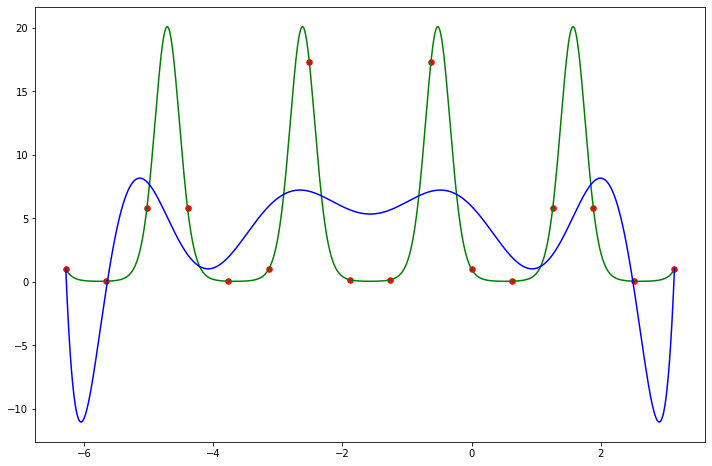

In [11]:

Yc = p(X)
s_max, s_sqr = f_compare_max(Y,Yc), f_compare_sqr(Y,Yc)


plt.plot(X,Y,'g')
plt.plot(X, Yc, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

In [12]:
print("largest difference        : ",round(s_max,2))
print("sum of squared differences: ",round(s_sqr,2))

largest difference        :  15.08
sum of squared differences:  83063.97


# 16 nodes and 20 degree polinomial

In [13]:
n,m=16,20

In [14]:
xc = np.array(even(n, a, b))
yc = f(xc)
p = lsquares(xc,yc,m)

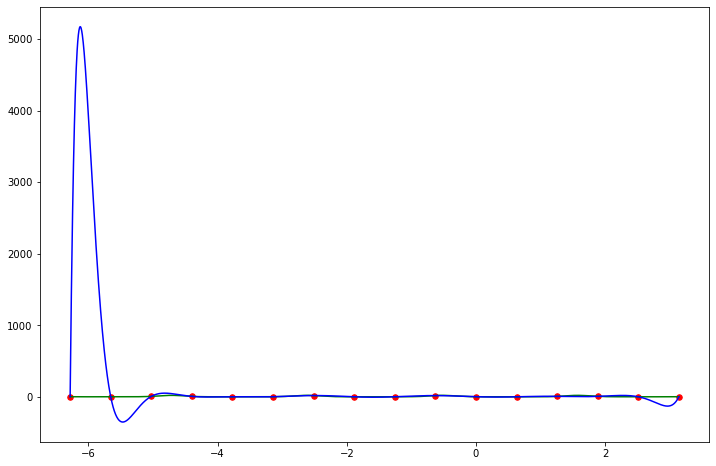

In [15]:

Yc = p(X)
s_max, s_sqr = f_compare_max(Y,Yc), f_compare_sqr(Y,Yc)


plt.plot(X,Y,'g')
plt.plot(X, Yc, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

In [16]:
print("largest difference        : ",round(s_max,2))
print("sum of squared differences: ",round(s_sqr,2))

largest difference        :  5174.1
sum of squared differences:  1412594870.38


# 16 nodes and 30 degree polinomial

In [17]:
n,m=16,30

In [18]:
xc = np.array(even(n, a, b))
yc = f(xc)
p = lsquares(xc,yc,m)

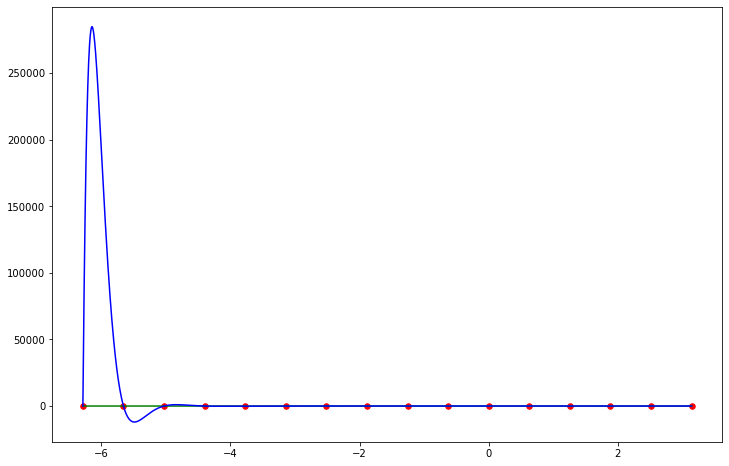

In [19]:

Yc = p(X)
s_max, s_sqr = f_compare_max(Y,Yc), f_compare_sqr(Y,Yc)


plt.plot(X,Y,'g')
plt.plot(X, Yc, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

In [20]:
print("largest difference        : ",round(s_max,2))
print("sum of squared differences: ",round(s_sqr,2))

largest difference        :  284821.77
sum of squared differences:  3974169130647.3


# 32 nodes and 10 degree polinomial

In [21]:
n,m=32,10

In [22]:
xc = np.array(even(n, a, b))
yc = f(xc)
p = lsquares(xc,yc,m)

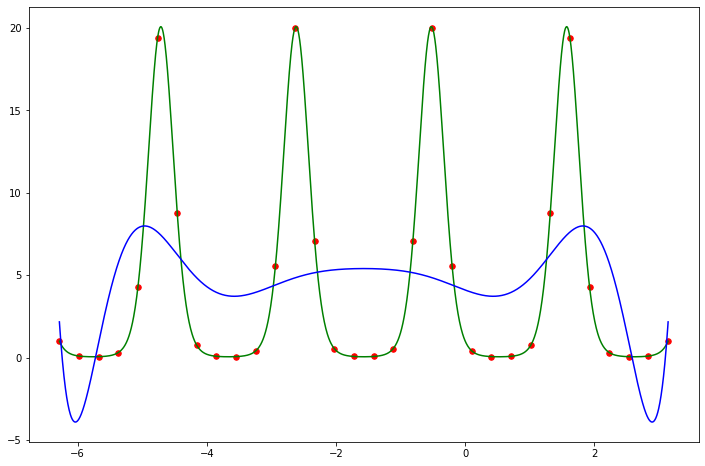

In [23]:

Yc = p(X)
s_max, s_sqr = f_compare_max(Y,Yc), f_compare_sqr(Y,Yc)


plt.plot(X,Y,'g')
plt.plot(X, Yc, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

In [24]:
print("largest difference        : ",round(s_max,2))
print("sum of squared differences: ",round(s_sqr,2))

largest difference        :  15.22
sum of squared differences:  67278.89


# 32 nodes and 20 degree polinomial

In [25]:
n,m=32,20

In [26]:
xc = np.array(even(n, a, b))
yc = f(xc)
p = lsquares(xc,yc,m)

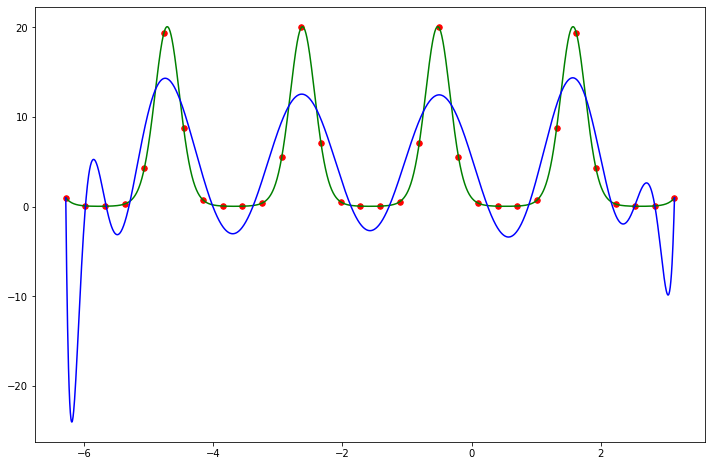

In [27]:

Yc = p(X)
s_max, s_sqr = f_compare_max(Y,Yc), f_compare_sqr(Y,Yc)


plt.plot(X,Y,'g')
plt.plot(X, Yc, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

In [28]:
print("largest difference        : ",round(s_max,2))
print("sum of squared differences: ",round(s_sqr,2))

largest difference        :  24.45
sum of squared differences:  40396.84


# 32 nodes and 30 degree polinomial

In [29]:
n,m=32,30

In [30]:
xc = np.array(even(n, a, b))
yc = f(xc)
p = lsquares(xc,yc,m)

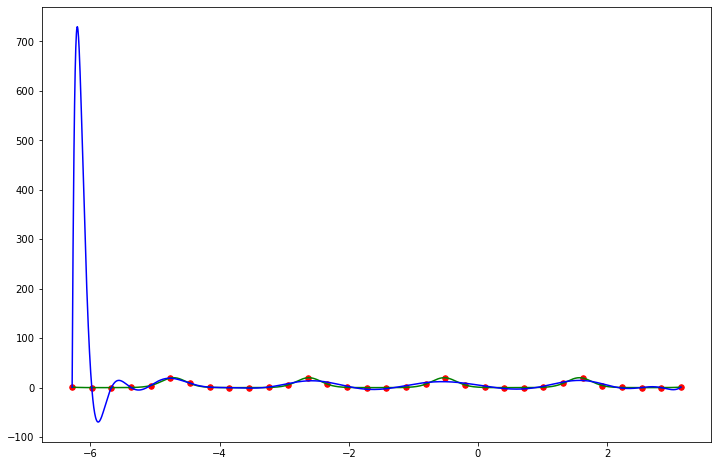

In [31]:

Yc = p(X)
s_max, s_sqr = f_compare_max(Y,Yc), f_compare_sqr(Y,Yc)


plt.plot(X,Y,'g')
plt.plot(X, Yc, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

In [32]:
print("largest difference        : ",round(s_max,2))
print("sum of squared differences: ",round(s_sqr,2))

largest difference        :  729.06
sum of squared differences:  14198723.27


# 64 nodes and 10 degree polinomial

In [33]:
n,m=64,10

In [34]:
xc = np.array(even(n, a, b))
yc = f(xc)
p = lsquares(xc,yc,m)

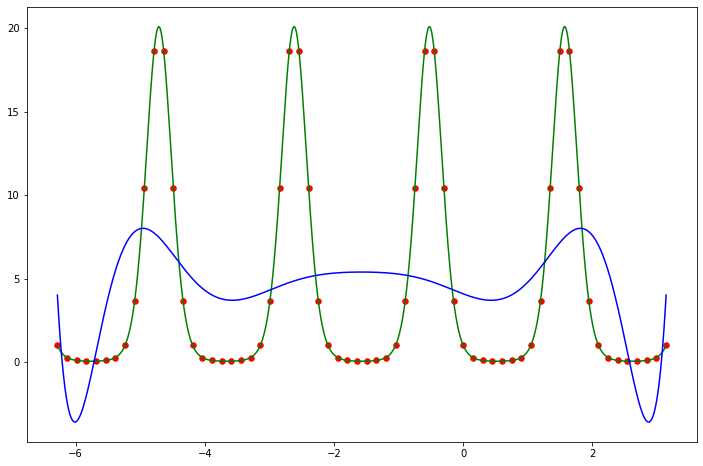

In [35]:

Yc = p(X)
s_max, s_sqr = f_compare_max(Y,Yc), f_compare_sqr(Y,Yc)


plt.plot(X,Y,'g')
plt.plot(X, Yc, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

In [36]:
print("largest difference        : ",round(s_max,2))
print("sum of squared differences: ",round(s_sqr,2))

largest difference        :  15.23
sum of squared differences:  66602.79


# 64 nodes and 20 degree polinomial

In [37]:
n,m=64,20

In [38]:
xc = np.array(even(n, a, b))
yc = f(xc)
p = lsquares(xc,yc,m)

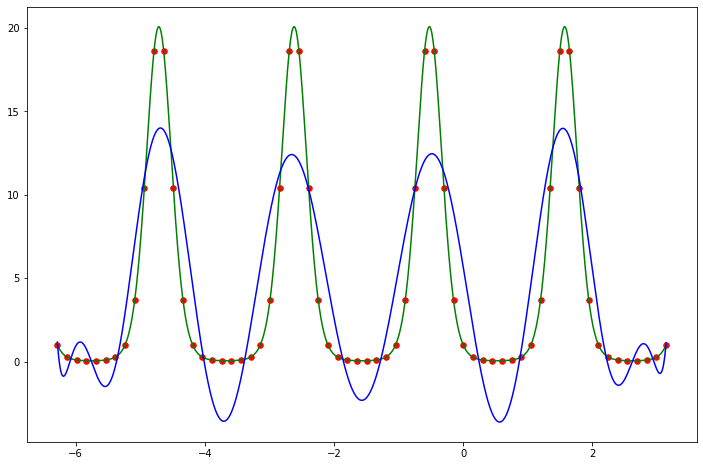

In [39]:

Yc = p(X)
s_max, s_sqr = f_compare_max(Y,Yc), f_compare_sqr(Y,Yc)


plt.plot(X,Y,'g')
plt.plot(X, Yc, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

In [40]:
print("largest difference        : ",round(s_max,2))
print("sum of squared differences: ",round(s_sqr,2))

largest difference        :  7.72
sum of squared differences:  19889.58


# 64 nodes and 30 degree polinomial

In [41]:
n,m=64,30

In [42]:
xc = np.array(even(n, a, b))
yc = f(xc)
p = lsquares(xc,yc,m)

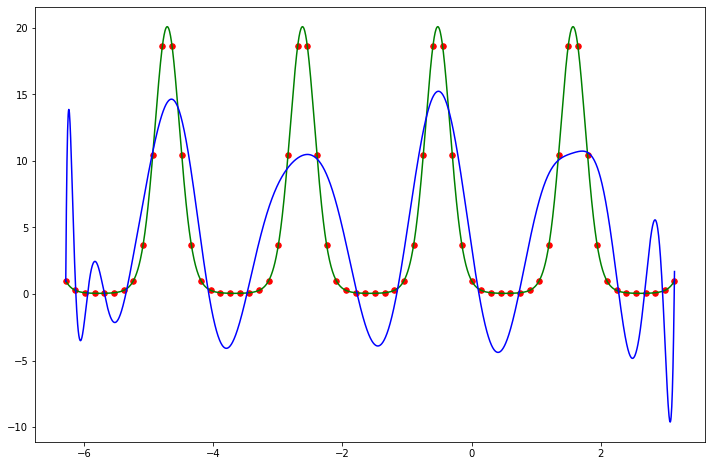

In [43]:

Yc = p(X)
s_max, s_sqr = f_compare_max(Y,Yc), f_compare_sqr(Y,Yc)


plt.plot(X,Y,'g')
plt.plot(X, Yc, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

In [44]:
print("largest difference        : ",round(s_max,2))
print("sum of squared differences: ",round(s_sqr,2))

largest difference        :  13.21
sum of squared differences:  34170.69


# 128 nodes and 10 degree polinomial

In [45]:
n,m=128,10

In [46]:
xc = np.array(even(n, a, b))
yc = f(xc)
p = lsquares(xc,yc,m)

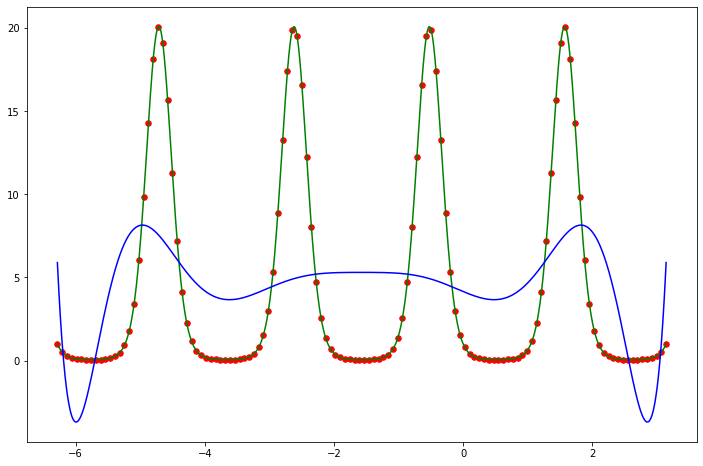

In [47]:

Yc = p(X)
s_max, s_sqr = f_compare_max(Y,Yc), f_compare_sqr(Y,Yc)


plt.plot(X,Y,'g')
plt.plot(X, Yc, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

In [48]:
print("largest difference        : ",round(s_max,2))
print("sum of squared differences: ",round(s_sqr,2))

largest difference        :  15.15
sum of squared differences:  66141.05


# 128 nodes and 20 degree polinomial

In [49]:
n,m=128,20

In [50]:
xc = np.array(even(n, a, b))
yc = f(xc)
p = lsquares(xc,yc,m)

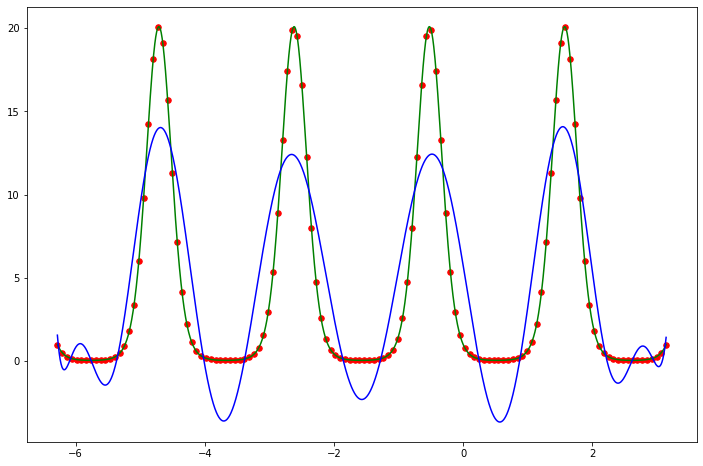

In [51]:

Yc = p(X)
s_max, s_sqr = f_compare_max(Y,Yc), f_compare_sqr(Y,Yc)


plt.plot(X,Y,'g')
plt.plot(X, Yc, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

In [52]:
print("largest difference        : ",round(s_max,2))
print("sum of squared differences: ",round(s_sqr,2))

largest difference        :  7.72
sum of squared differences:  19789.08


# 128 nodes and 30 degree polinomial

In [53]:
n,m=128,30

In [54]:
xc = np.array(even(n, a, b))
yc = f(xc)
p = lsquares(xc,yc,m)

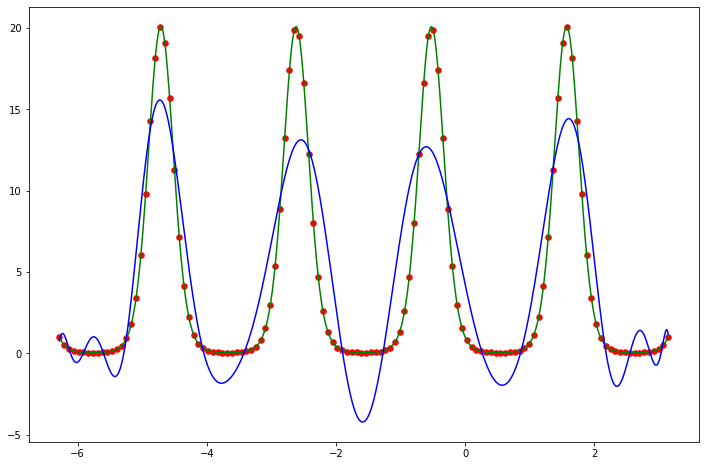

In [55]:

Yc = p(X)
s_max, s_sqr = f_compare_max(Y,Yc), f_compare_sqr(Y,Yc)


plt.plot(X,Y,'g')
plt.plot(X, Yc, 'b')
plt.scatter(xc,yc,c='r',s=30,marker = 'o')

plt.show()

In [56]:
print("largest difference        : ",round(s_max,2))
print("sum of squared differences: ",round(s_sqr,2))

largest difference        :  7.64
sum of squared differences:  16766.33
